### Importing Libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [87]:
df = pd.read_csv("insurance.csv")

In [88]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* Target : Prepare a model that can predict the insurance charges on a person 
  given the attributes 

### Data Cleaning

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [90]:
# Returns the mean,std,median.. for numarical data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Feature Engineering

In [91]:
# drop_first : will drop one parameter
# If we drop female, we can predict the sex via one parameter only since if male=0 its female
Male = pd.get_dummies(df['sex'],drop_first=True)
# Concatinate "Male" column to the original dataset
df   = pd.concat([df,Male],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [92]:
Smoker = pd.get_dummies(df['smoker'],drop_first=True)
# Concatinate "smoker" column to the original dataset
df   = pd.concat([df,Smoker],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [93]:
# Rename the columns
df = df.rename(columns={'yes':'Smoker'})
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [94]:
# We have 4 different regions
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [95]:
Region = pd.get_dummies(df['region'],drop_first=True)
# Concatinate "smoker" column to the original dataset
df   = pd.concat([df,Region],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


### Exploratory Data Analysis

In [96]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

### Distribution of "Sex" Parameter

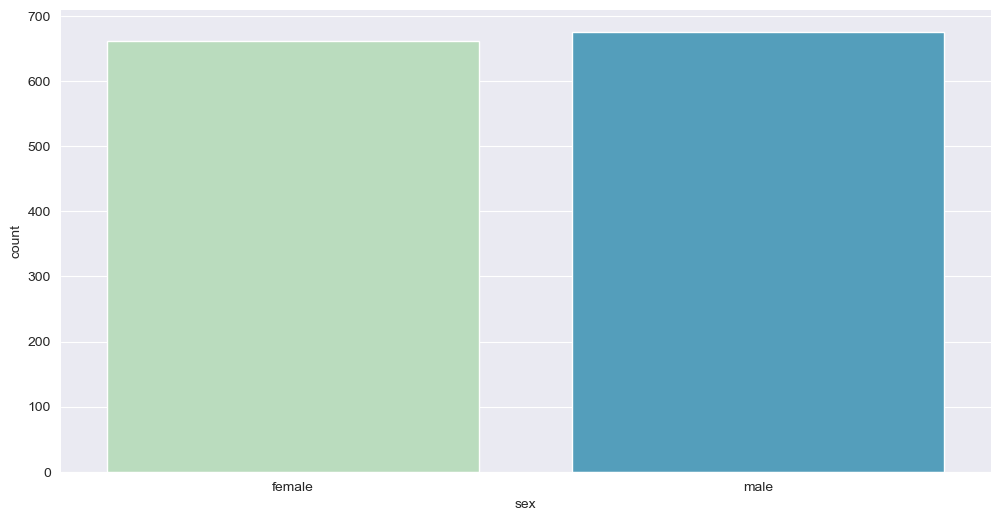

In [97]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.countplot(x="sex",data=df,palette="GnBu")
# Removing Side Boxes
sns.despine(left=True)

### Relationship of smoking and gender to charges

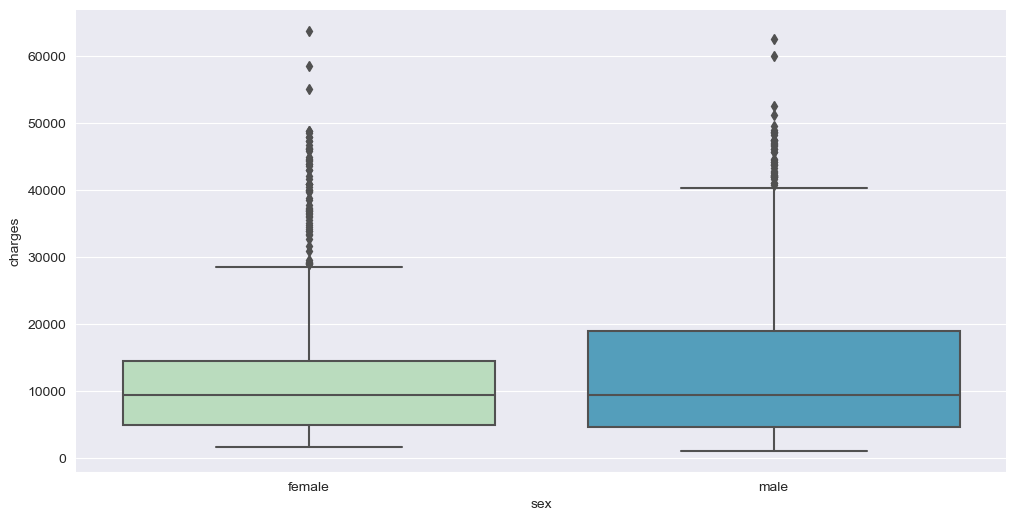

In [98]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(x="sex",y="charges",data=df,palette="GnBu")
# Removing Side Boxes
sns.despine(left=True)

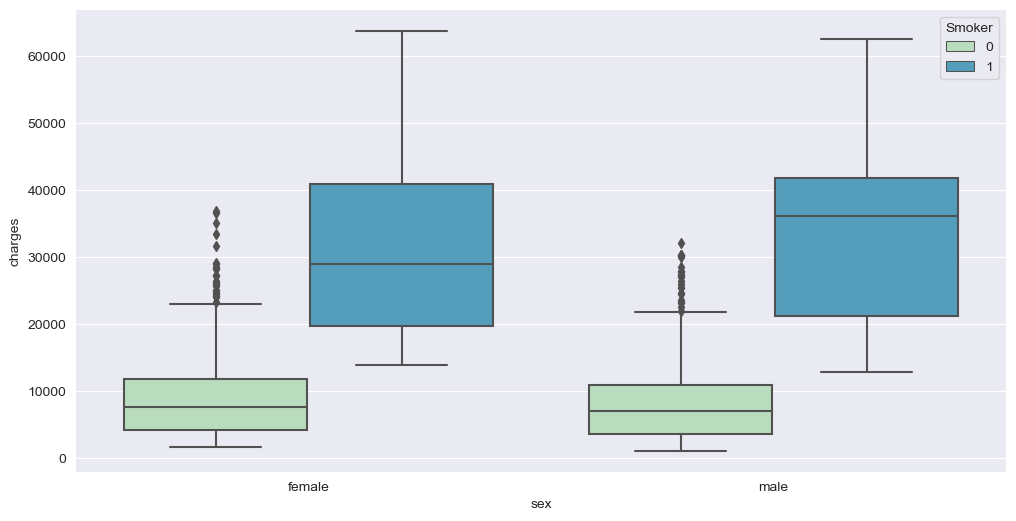

In [99]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.boxplot(x="sex",y="charges",data=df,palette="GnBu",hue="Smoker")
# Removing Side Boxes
sns.despine(left=True)

* We can conclude that people who "smoke" have high charges on insurance.

### Relationship between age and charges

<Axes: xlabel='age', ylabel='charges'>

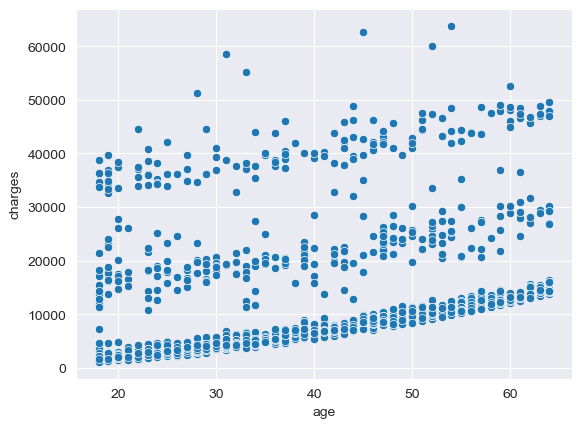

In [100]:
sns.scatterplot(x="age",y="charges",data=df)

<Axes: xlabel='age', ylabel='charges'>

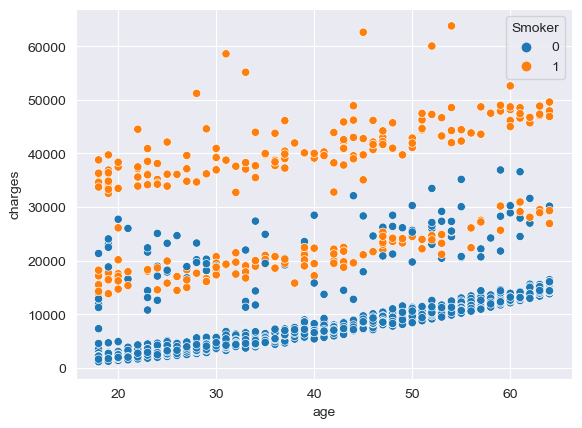

In [101]:
sns.scatterplot(x="age",y="charges",data=df,hue="Smoker")

* With increasing age people who "smoke" have a higher insurance charge.
* We conclude that older people who smoke have high insurance charge.

### Relationship with BMI

<Axes: xlabel='bmi', ylabel='charges'>

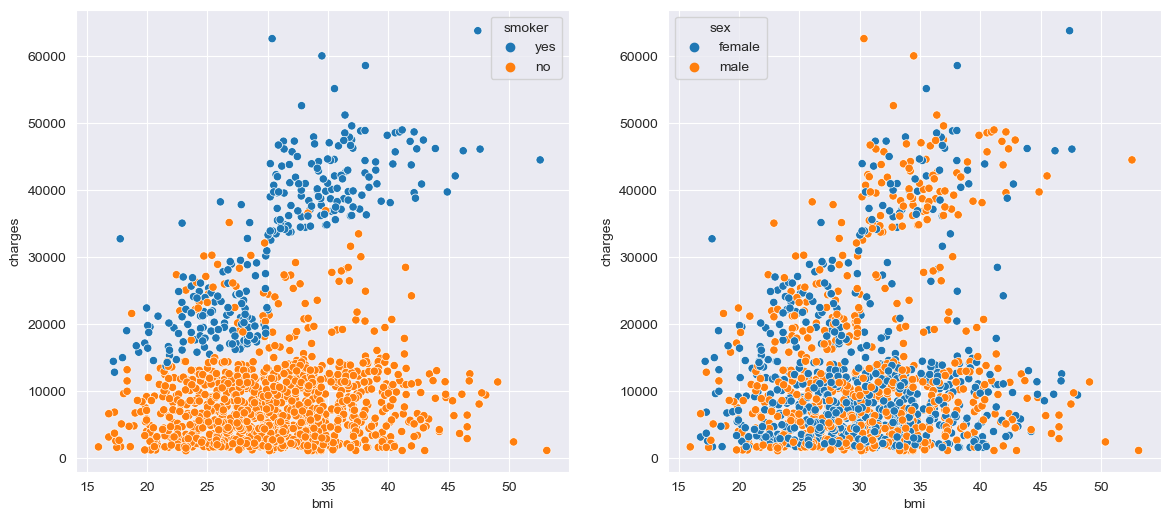

In [102]:
# Define no.of rows and columns
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(14,6))
sns.scatterplot(x="bmi",y="charges",data=df,hue="sex",   ax = ax[1])
sns.scatterplot(x="bmi",y="charges",data=df,hue="smoker",ax = ax[0])

In [103]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [104]:
# Removing the non-numarical columns
df.drop(["sex","smoker","region"],axis=1,inplace=True)

In [105]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<Axes: >

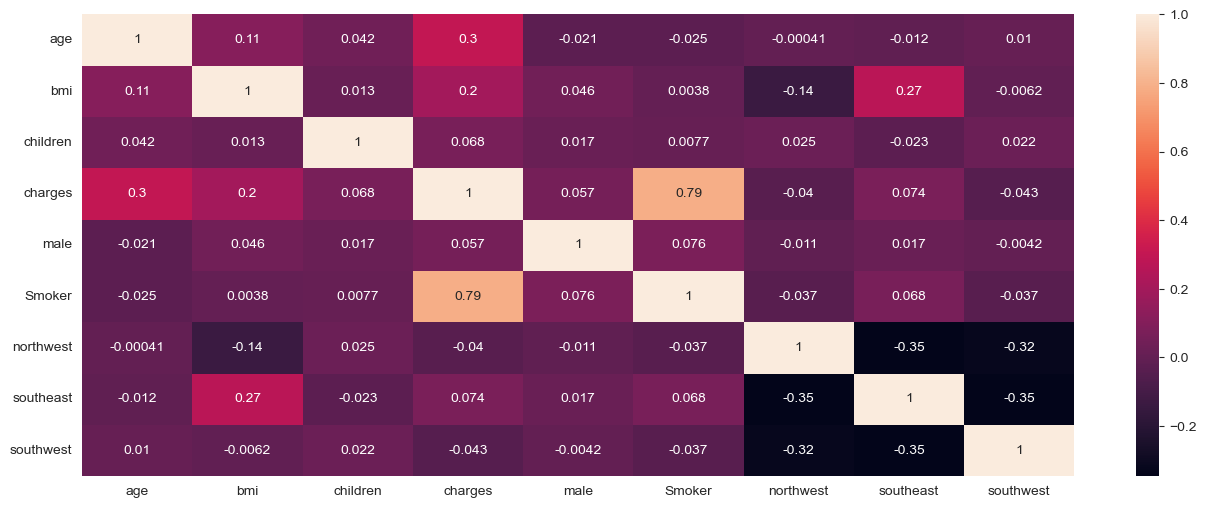

In [106]:
# Correlation matrix
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),annot=True)

### Splitting the Data

In [107]:
x = df.drop("charges",axis=1)
y = df["charges"]

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.4)

In [109]:
X_train.shape

(802, 8)

In [110]:
X_test.shape

(536, 8)

In [111]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


### Scaling the Dataset
* So that all values have same range

In [112]:
# Prevents bias
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [113]:
# We only scale the input and not the output

# scaled_x_train = (x_train - x_train_mean) / std
# fit_transform : To know the std and value for each data
scaled_x_train = scaler.fit_transform(X_train)
# for test data we don't know the std, so we only use transform
scaled_x_test = scaler.transform(X_test)

In [114]:
scaled_x_train

array([[-1.40207614,  0.27212738, -0.11679956, ...,  1.81349664,
        -0.62060197, -0.58022984],
       [-0.52592649,  0.39496049,  1.54113405, ...,  1.81349664,
        -0.62060197, -0.58022984],
       [-0.37990155, -1.34005724,  0.71216724, ..., -0.55142093,
        -0.62060197, -0.58022984],
       ...,
       [-1.54810108,  0.42324443, -0.94576637, ..., -0.55142093,
         1.61133875, -0.58022984],
       [-0.37990155,  0.19535668, -0.11679956, ..., -0.55142093,
        -0.62060197, -0.58022984],
       [ 1.37239776, -0.8947872 , -0.94576637, ..., -0.55142093,
        -0.62060197, -0.58022984]])

### Support Vector Regression Model

In [115]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(scaled_x_train,y_train)

SVR()

In [116]:
predict = regressor.predict(scaled_x_test)

In [117]:
predict.shape

(536,)

In [118]:
y_test.shape

(536,)

In [119]:
# Predicted Value
predict[:10]

array([9316.13507697, 9327.04384798, 9345.54379811, 9264.13083247,
       9264.28735905, 9250.22258763, 9320.51997466, 9322.86402472,
       9249.63938524, 9312.42642777])

In [120]:
# Actual Value
y_test[:10]

780     18259.21600
514     21082.16000
1321    28101.33305
942      2217.46915
276      2803.69785
468     23288.92840
741     18246.49550
730     19361.99880
882      2585.85065
371     12029.28670
Name: charges, dtype: float64